In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Ecom_data.csv")

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,17747349,R2EI7QLPK4LF7U,B00U7LCE6A,106182406,CCleaner Free [Download],Digital_Software,4,0,0,N,Y,Four Stars,So far so good,2015-08-31
1,US,10956619,R1W5OMFK1Q3I3O,B00HRJMOM4,162269768,ResumeMaker Professional Deluxe 18,Digital_Software,3,0,0,N,Y,Three Stars,Needs a little more work.....,2015-08-31
2,US,13132245,RPZWSYWRP92GI,B00P31G9PQ,831433899,Amazon Drive Desktop [PC],Digital_Software,1,1,2,N,Y,One Star,Please cancel.,2015-08-31
3,US,35717248,R2WQWM04XHD9US,B00FGDEPDY,991059534,Norton Internet Security 1 User 3 Licenses,Digital_Software,5,0,0,N,Y,Works as Expected!,Works as Expected!,2015-08-31
4,US,17710652,R1WSPK2RA2PDEF,B00FZ0FK0U,574904556,SecureAnywhere Intermet Security Complete 5 De...,Digital_Software,4,1,2,N,Y,Great antivirus. Worthless customer support,I've had Webroot for a few years. It expired a...,2015-08-31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394870 entries, 0 to 394869
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        394870 non-null  object
 1   customer_id        394870 non-null  int64 
 2   review_id          394870 non-null  object
 3   product_id         394870 non-null  object
 4   product_parent     394870 non-null  int64 
 5   product_title      394870 non-null  object
 6   product_category   394870 non-null  object
 7   star_rating        394870 non-null  int64 
 8   helpful_votes      394870 non-null  int64 
 9   total_votes        394870 non-null  int64 
 10  vine               394870 non-null  object
 11  verified_purchase  394870 non-null  object
 12  review_headline    394865 non-null  object
 13  review_body        394866 non-null  object
 14  review_date        394861 non-null  object
dtypes: int64(5), object(10)
memory usage: 45.2+ MB


<Axes: ylabel='star_rating'>

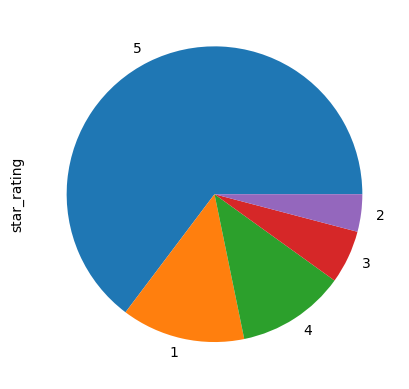

In [ ]:
# 1. Analyze the distribution of star ratings in the given dataset.

rating_count = df['star_rating'].value_counts()
# Plot the bar graph
rating_count.plot(kind='pie')

In [ ]:
# 2. Identify the highest and lowest ratings given by the customers for each kind of product.

max_ratings = df.groupby('product_category')['star_rating'].max()
min_ratings = df.groupby('product_category')['star_rating'].min()

In [ ]:
max_ratings

product_category
Digital_Software       5
Digital_Video_Games    5
Gift Card              5
Name: star_rating, dtype: int64

In [ ]:
min_ratings

product_category
Digital_Software       1
Digital_Video_Games    1
Gift Card              1
Name: star_rating, dtype: int64

In [ ]:
prod_cat_ratings = pd.concat([max_ratings,min_ratings], axis=1)

In [ ]:
prod_cat_ratings

,star_rating,star_rating
product_category,,
Digital_Software,5,1
Digital_Video_Games,5,1
Gift Card,5,1


In [ ]:
# 3. Identify the customer who has rated maximum number of products, and the number of such products that they've rated.

# Count the number of ratings for each customer
ratings_per_customer = df['customer_id'].value_counts(ascending=False)
# Find the maximum count of ratings
max_ratings_count = ratings_per_customer.max()
#Find the customer with highest no.of ratings
customers_with_max_ratings = ratings_per_customer[ratings_per_customer == max_ratings_count]

print("Customer ID with the highest number of ratings:")
print(customers_with_max_ratings)

print("Number of ratings:", max_ratings_count)

Customer ID with the highest number of ratings:
21925455    95
Name: customer_id, dtype: int64
Number of ratings: 95


In [ ]:
# 4. How many users have rated atleast 50 products?

no_of_rated_products_per_user = df.groupby('customer_id')['star_rating'].count().sort_values(ascending=False)
c = sum(no_of_rated_products_per_user >= 50)
print(f'No. of users who have rated atleast 50 products : ', c)

No. of users who have rated atleast 50 products :  7


In [ ]:
# 5. Which is the most popular product?

no_of_rate_perproduct= df.groupby('product_title')['star_rating'].count().sort_values(ascending=False)
no_of_rate_perproduct[:1]

product_title
Amazon.com eGift Cards    36870
Name: star_rating, dtype: int64

In [ ]:
# 6. How many products in the given data have received more than 6500 ratings?

c = sum(no_of_rate_perproduct >= 6500)
print('No. of products with more than 6500 ratings: {}\n'.format(c))

No. of products with more than 6500 ratings: 7



In [ ]:
df['verified_purchase'].value_counts()

Y    329627
N     65243
Name: verified_purchase, dtype: int64

In [ ]:
# 7. How many unverified purchases have been flagged for each product category? What has been the rating given for such purchases on an average?

unv_perch = df[df['verified_purchase']=="N"]
unv_purch_grp = unv_perch.groupby('product_category')['verified_purchase','star_rating'].agg({'verified_purchase':'count', 'star_rating':'mean'})
unv_purch_grp

<ipython-input-36-a8bd93869707>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unv_purch_grp = unv_perch.groupby('product_category')['verified_purchase','star_rating'].agg({'verified_purchase':'count', 'star_rating':'mean'})


,verified_purchase,star_rating
product_category,,
Digital_Software,31154,3.531746
Digital_Video_Games,21068,3.433169
Gift Card,13021,4.578143


In [ ]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

<Axes: xlabel='product_title'>

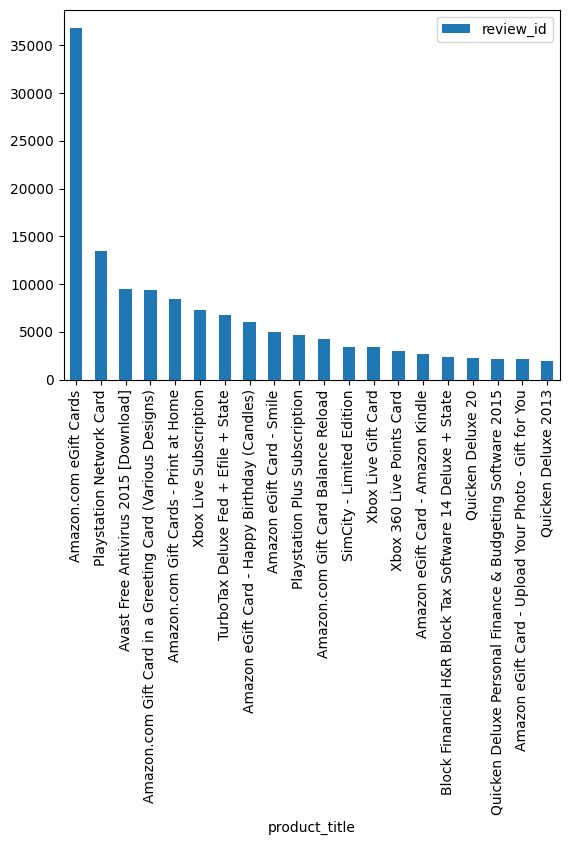

In [ ]:
# 8. Visualize the top 20 most popular products as per the given data.

popular_products = pd.DataFrame(df.groupby('product_title')['review_id'].count())
most_popular = popular_products.sort_values('review_id', ascending=False)
most_popular.head(20).plot(kind = "bar")

In [ ]:
# 9. Extract the product titles with the product parent ID-106182406.

# Filter the dataframe based on the given product parent ID
filtered_df = df[df['product_parent'] == 106182406]
# Extract the product titles
product_titles = filtered_df['product_title']
# Print the product titles
print(product_titles.unique())

['CCleaner Free [Download]']


In [ ]:
# 10. How many product reviews were recorded on the date 2015-08-31?

# Filter the dataframe based on the target date
fil_df = df[df['review_date'] == '2015-08-31']
print(len(fil_df))

341
